In [39]:
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint
import os
import numpy as np

directory = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/observational_data/MilkyWay/COBE-FIRAS/'
spec = [10, 8, 8]
files = os.listdir(directory)
cobe = fits.open(directory+files[0])
input_wcs = WCS(cobe[1].header)
input_wcs.printwcs()
pprint(cobe[1].header)
# for i,file in enumerate(files):
#     cobe = fits.open(directory+file)
#     linfrq = np.array([cobe[0].header['LINFRQ{}'.format(j+1)] for j in range(spec[i])])
#     print(file)
#     print()
#     print(linfrq)
#     print()
#     pprint(cobe[0].header)
#     print()
#     pprint(cobe[1].header)
#     print()
#     print(cobe[1].data['LINE_FLU'][0])
#     print('\n--------------------\n')

WCS Keywords

Number of WCS axes: 2
CTYPE : ''  ''  
CRVAL : 0.0  0.0  
CRPIX : 0.0  0.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : 1.0  1.0  
NAXIS : 156  6067
XTENSION= 'BINTABLE'           / Extension type is Binary Table                 
BITPIX  =                    8 / Binary data                                    
NAXIS   =                    2 / Data are in a table                            
NAXIS1  =                  156 / Number of 8 bit bytes in each row              
NAXIS2  =                 6067 / Number of rows                                 
PCOUNT  =                    0 / Number of bytes of data following table        
GCOUNT  =                    1 / Group count (always 1 for bintable extensions) 
TFIELDS =                   12 / Number of fields (columns) in the table        
COMMENT                                                                         
COMMENT                                                                         
COMMENT   

In [77]:
a = np.array([[[1,2],[3,4],[5,6]], [[7,8],[9,10],[11,12]], [[13,14],[15,16],[17,18]], [[19,20],[21,22],[23,24]]])
a

array([[[ 1,  2],
        [ 3,  4],
        [ 5,  6]],

       [[ 7,  8],
        [ 9, 10],
        [11, 12]],

       [[13, 14],
        [15, 16],
        [17, 18]],

       [[19, 20],
        [21, 22],
        [23, 24]]])

In [78]:
a.reshape(-1, 2)

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10],
       [11, 12],
       [13, 14],
       [15, 16],
       [17, 18],
       [19, 20],
       [21, 22],
       [23, 24]])

In [239]:
import os
import cygrid
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.io import fits
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from pprint import pprint


cogal = fits.open(r'/media/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/COGAL/COGAL_deep_interp.fits')
# data = np.swapaxes(np.swapaxes(cogal[0].data, 0, 1), 1, 2)
data = np.nan_to_num(cogal[0].data.reshape(-1, cogal[0].shape[-1]), nan=0)
# data = cogal[0].data.reshape(-1, cogal[0].shape[-1])
# print(cogal[0].data.flags)
input_wcs = WCS(cogal[0].header)
input_wcs.printwcs()
print()
pprint(cogal[0].header)
print(np.where(np.isnan(cogal[0].data))[0].size)

target_header = {
    'NAXIS': 3,
    'NAXIS1': 361,
    'NAXIS2': 11,
    'NAXIS3': cogal[0].header['NAXIS1'],
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0.,
    'CDELT1': 1,
    'CRPIX1': 181,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0.,
    'CDELT2': 1,
    'CRPIX2': 6,
    'CTYPE3': 'VELO',
    'CRVAL3': cogal[0].header['CRVAL1'],
    'CDELT3': cogal[0].header['CDELT1'],
    'CRPIX3': cogal[0].header['CRPIX1'],
}

target_header2 = {
    'NAXIS': 2,
    'NAXIS1': 721,
    'NAXIS2': 81,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0.,
    'CDELT1': 1.,
    'CRPIX1': 360.5,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0.,
    'CDELT2': 0.125,
    'CRPIX2': 40.5,
}

target_wcs = WCS(target_header)
target_wcs2 = WCS(target_header2)

vel = np.linspace(cogal[0].header['CRVAL1']-cogal[0].header['CDELT1']*(cogal[0].header['CRPIX1']-1),
                  cogal[0].header['CRVAL1']+cogal[0].header['CDELT1']*(cogal[0].header['NAXIS1']-cogal[0].header['CRPIX1']),
                  num=cogal[0].header['NAXIS1'])
lon = np.linspace(cogal[0].header['CRVAL2']-cogal[0].header['CDELT2']*(cogal[0].header['CRPIX2']-1),
                  cogal[0].header['CRVAL2']+cogal[0].header['CDELT2']*(cogal[0].header['NAXIS2']-cogal[0].header['CRPIX2']),
                  num=cogal[0].header['NAXIS2'])
lat = np.linspace(cogal[0].header['CRVAL3']-cogal[0].header['CDELT3']*(cogal[0].header['CRPIX3']-1),
                  cogal[0].header['CRVAL3']+cogal[0].header['CDELT3']*(cogal[0].header['NAXIS3']-cogal[0].header['CRPIX3']),
                  num=cogal[0].header['NAXIS3'])

lon_mesh, lat_mesh = np.meshgrid(lon, lat)

# input_vel_pix,input_lon_pix,input_lat_pix = np.meshgrid(np.arange(cogal[0].header['NAXIS1']), np.arange(cogal[0].header['NAXIS2']), np.arange(cogal[0].header['NAXIS3']))
# input_lon_world, input_lat_world, input_vel_world = input_wcs.all_pix2world(input_lon_pix, input_lat_pix, input_vel_pix, 0)
# print(input_lon_world)
# coords_eq = SkyCoord(input_lon_world, input_lat_world, frame='icrs', unit='deg')
# coords_gal = coords_eq.galactic

kernel_sigma = 0.5

kernel_type = 'gauss1d'
kernel_params = (kernel_sigma, )
kernel_support = 0.3
hpx_maxres = 0.1

mygridder = cygrid.WcsGrid(target_header)
mygridder.set_kernel(kernel_type, kernel_params, kernel_support, hpx_maxres)
mygridder.grid(lon_mesh.flatten(), lat_mesh.flatten(), data)

cygrid_data = mygridder.get_datacube()
cygrid_integrated_data = np.trapz(cygrid_data, vel, axis=0)

integrated_data = np.trapz(np.nan_to_num(cogal[0].data), vel, axis=2)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'VOPT'  'GLON-CAR'  'GLAT-CAR'  
CRVAL : -319.8  180.0  0.0  
CRPIX : 1.0  1.0  41.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : 1.3  -0.125  0.125  
NAXIS : 493  2881  81

SIMPLE  =                    T  / Standard FITS format                          
BITPIX  =                  -32 / Bits per pixel                                 
NAXIS   =                    3  / Number of axes                                
NAXIS1  =                  493  / Number pixels on axis 1                       
NAXIS2  =                 2881  / Number pixels on axis 2                       
NAXIS3  =                   81  / Number pixels on axis 3                       
CTYPE1  = 'VELO-LSR'            / axis 1 coord type                             
CRVAL1  =        -3.198000E+02  / coord value at CRPIX1                         
CDELT1  =         1.300000E+00  / linear pixel spacing axi

(493, 11, 361)
(11, 361)


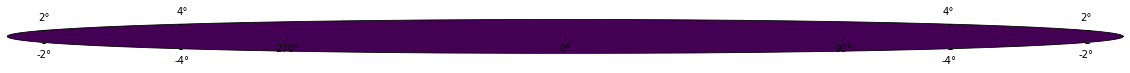

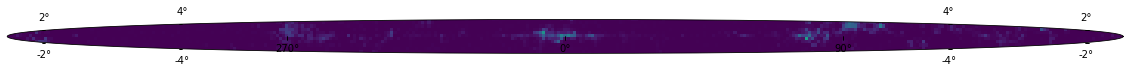

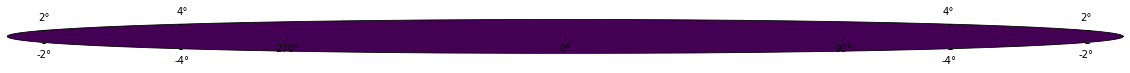

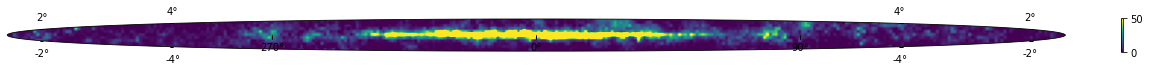

In [246]:
target_header2 = {
    'NAXIS': 2,
    'NAXIS1': 361,
    'NAXIS2': 11,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0.,
    'CDELT1': 1,
    'CRPIX1': 181,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0.,
    'CDELT2': 1,
    'CRPIX2': 6,
}

target_wcs2 = WCS(target_header2)

print(cygrid_data.shape)
print(cygrid_integrated_data.shape)

for i_vel in [0, 245, 492]:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection=target_wcs, frame_class=EllipticalFrame, slices=('x', 'y', 250))
#     ax = fig.add_subplot(111)
    ax.imshow(cygrid_data[i_vel, :, :], vmin=0, vmax=10)
    plt.show()
    
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection=target_wcs2, frame_class=EllipticalFrame)
# ax = fig.add_subplot(111, projection='mollweide')
cb = ax.imshow(cygrid_integrated_data, vmin=0, vmax=50)
fig.colorbar(cb, ax=ax, fraction=0.002, aspect=15)
plt.show()

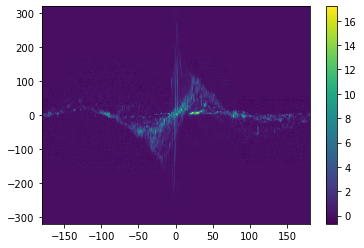

In [226]:
from copy import copy

vel = np.linspace(target_header['CRVAL3']-target_header['CDELT3']*(target_header['CRPIX3']-1),
                  target_header['CRVAL3']+target_header['CDELT3']*(target_header['NAXIS3']-target_header['CRPIX3']),
                  num=target_header['NAXIS3'])
lat = np.linspace(target_header['CRVAL2']-target_header['CDELT2']*(target_header['CRPIX2']-1),
                  target_header['CRVAL2']+target_header['CDELT2']*(target_header['NAXIS2']-target_header['CRPIX2']),
                  num=target_header['NAXIS2'])
lon = np.linspace(target_header['CRVAL1']-target_header['CDELT1']*(target_header['CRPIX1']-1),
                  target_header['CRVAL1']+target_header['CDELT1']*(target_header['NAXIS1']-target_header['CRPIX1']),
                  num=target_header['NAXIS1'])

data = np.trapz(cygrid_data[:, :, :], lat[:], axis=1)
# data[data<=0] = np.nan
cb = plt.pcolor(lon, vel, data, shading='auto')
plt.colorbar()

(81, 2881, 493)
(81, 2881)


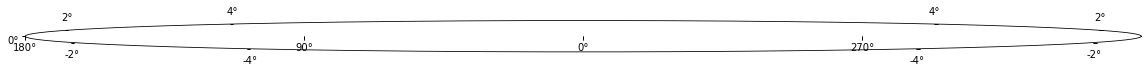

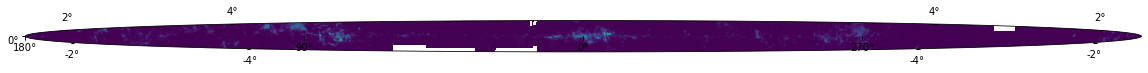

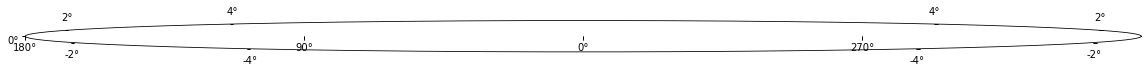

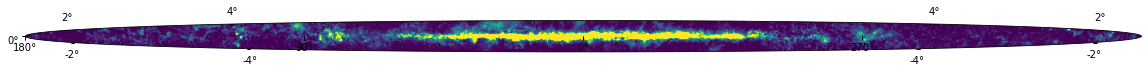

In [188]:
target_header2 = {
    'NAXIS': 2,
    'NAXIS1': 2881,
    'NAXIS2': 81,
    'CTYPE1': 'GLON-CAR',
    'CRVAL1': 0.,
    'CDELT1': -0.125,
    'CRPIX1': 1440.5,
    'CTYPE2': 'GLAT-CAR',
    'CRVAL2': 0.,
    'CDELT2': 0.125,
    'CRPIX2': 40.5,
}

target_wcs2 = WCS(target_header2)

print(cogal[0].data.shape)
print(cygrid_integrated_data.shape)

for i_vel in [0, 245, 492]:
    fig = plt.figure(figsize=(20, 20))
    ax = fig.add_subplot(111, projection=target_wcs2, frame_class=EllipticalFrame, slices=('x', 'y'))
#     ax = fig.add_subplot(111)
#     ax.imshow(np.nan_to_num(cogal[0].data[:, :, i_vel], nan=0), vmin=0, vmax=10)
    ax.imshow(cogal[0].data[:, :, i_vel], vmin=0, vmax=10)
    plt.show()
    
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection=target_wcs2, frame_class=EllipticalFrame)
# ax = fig.add_subplot(111, projection='mollweide')
ax.imshow(integrated_data, vmin=0, vmax=50)
plt.show()

In [233]:
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint
import os

directory = '/media/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/Mopra/'
# files = os.listdir(directory)
mopra = fits.open(directory+"G300.5-12CO_Vfull.fits")
input_wcs = WCS(mopra[0].header)
input_wcs.printwcs()
print()
pprint(mopra[0].header)
print()
print(mopra[0].data.shape)
data = np.swapaxes(mopra[0].data, 0, 2)
data = np.swapaxes(data, 0, 1)
print(data.shape)
# print("\n")
# mopra = fits.open(directory+"G300.5-12CO_Vfull.fits")
# pprint(mopra[0].header)
# print("\n")
# mopra = fits.open(directory+"G349.5-12CO_Vfull.fits")
# pprint(mopra[0].header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SIN'  'GLAT-SIN'  'VOPT'  
CRVAL : 300.5  0.0  -63884.1341925  
CRPIX : 66.25  66.25  6150.0  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.00833333333333  0.00833333333333  87.6298323908  
NAXIS : 131  131  12298

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                  131  /                                               
NAXIS2  =                  131  /                                               
NAXIS3  =                12298  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                                               
BZERO   = 

In [236]:
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint
import os

directory = '/media/hpc_backup/yanitski/projects/pdr/observational_data/MilkyWay/ThrUMMS/'
files = os.listdir(directory)[0]
thrumms = fits.open(directory+files)
input_wcs = WCS(thrumms[0].header)
input_wcs.printwcs()
print('12' in files.split('.')[-2], '\n')
pprint(thrumms[0].header)
print()
print(thrumms[0].data.shape)
data = np.swapaxes(thrumms[0].data, 0, 2)
data = np.swapaxes(data, 0, 1)
print(data.shape)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SIN'  'GLAT-SIN'  'VOPT'  
CRVAL : 303.002105713  -0.00163632631302  -4.96913402592  
CRPIX : 458.0  155.0  185.875  
PC1_1 PC1_2 PC1_3  : 1.0  0.0  0.0  
PC2_1 PC2_2 PC2_3  : 0.0  1.0  0.0  
PC3_1 PC3_2 PC3_3  : 0.0  0.0  1.0  
CDELT : -0.00666666676601  0.00666666676601  350.501640291  
NAXIS : 915  309  352
True 

SIMPLE  =                    T  /                                               
BITPIX  =                  -32  /                                               
NAXIS   =                    3  /                                               
NAXIS1  =                  915  /                                               
NAXIS2  =                  309  /                                               
NAXIS3  =                  352  /                                               
EXTEND  =                    T  /                                               
BSCALE  =    1.00000000000E+00  /                               

In [30]:
from astropy.io import fits
from astropy.wcs import WCS
from pprint import pprint
import os

directory = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/observational_data/MilkyWay/SEDIGISM/'
files = os.listdir(directory)
sedigism = fits.open(directory+files[0])
input_wcs = WCS(sedigism[0].header)
input_wcs.printwcs()
obs_data = np.nansum(sedigism[0].data, axis=1)
pprint(sedigism[0].header)

WCS Keywords

Number of WCS axes: 3
CTYPE : 'GLON-SFL'  'GLAT-SFL'  'VRAD'  
CRVAL : 14.0  0.0  0.0  
CRPIX : 390.066925358  196.3200471654  801.0  
NAXIS : 774  391  1601
SIMPLE  =                    T / Written by IDL:  Tue May 15 15:42:06 2018      
BITPIX  =                  -32         /                                        
NAXIS   =                    3                                                  
NAXIS1  =                  774         /                                        
NAXIS2  =                  391         /                                        
NAXIS3  =                 1601         /                                        
DATAMIN = -0.1706138992310E+02         /                                        
DATAMAX =  0.2599013710022E+02         /                                        
BUNIT   = 'K       '           / Tmb                                            
CTYPE1  = 'GLON-GLS    '               /                                        
CRVAL1  =  0.14000

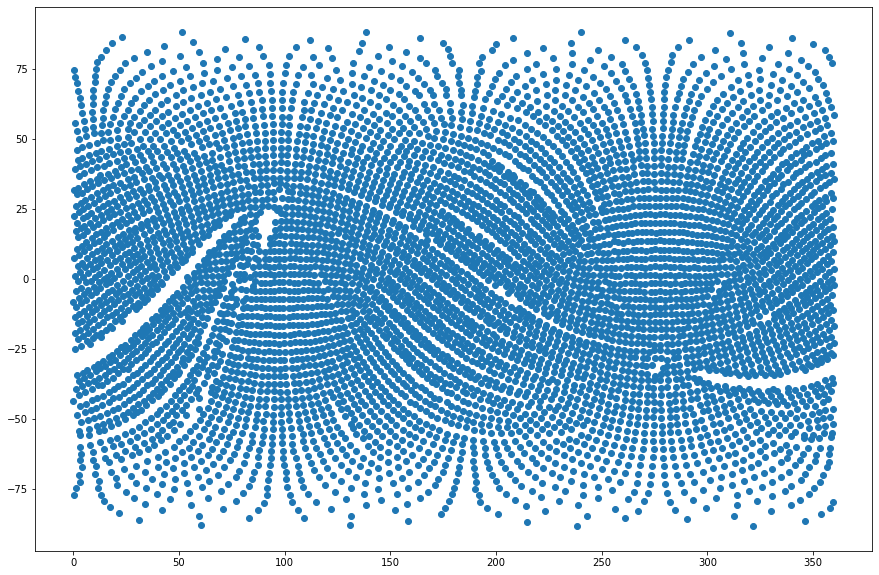

In [14]:
import matplotlib.pyplot as plt

lon = cobe[1].data['GAL_LON']
lat = cobe[1].data['GAL_LAT']
i = np.abs(lat) <= 2

plt.figure(figsize=(15, 10))
plt.scatter(lon, lat)

In [17]:
from astropy.io import fits
from pprint import pprint
import os
import numpy as np

directory = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/observational_data/MilkyWay/COBE-FIRAS/'
files = os.listdir(directory)
cobe = fits.open(directory+files[0])
# linfrq = np.array([cobe[0].header['LINFRQ1'], cobe[0].header['LINFRQ2'], cobe[0].header['LINFRQ3'],
#                    cobe[0].header['LINFRQ4'], cobe[0].header['LINFRQ5'], cobe[0].header['LINFRQ6'],
#                    cobe[0].header['LINFRQ7'], cobe[0].header['LINFRQ8'], cobe[0].header['LINFRQ9'],
#                    cobe[0].header['LINFRQ10']])
# print(type(cobe[0].header['LINFRQ1']))
pprint(cobe[0].header)
print(cobe[1].data['LINE_FLU'].shape)

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '03/12/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite          
INSTRUME= 'FIRAS   '           /  COBE instrument [DIRBE, DMR, FIRAS]           
OBJECT  = 'ALL-SKY '        

In [7]:
from astropy.io import fits
from pprint import pprint
import os
import numpy as np

directory = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/observational_data/MilkyWay/COBE_FIRAS/'
files = os.listdir(directory)
cobe = fits.open(directory+files[1])
# linfrq = np.array([cobe[0].header['LINFRQ1'], cobe[0].header['LINFRQ2'], cobe[0].header['LINFRQ3'],
#                    cobe[0].header['LINFRQ4'], cobe[0].header['LINFRQ5'], cobe[0].header['LINFRQ6'],
#                    cobe[0].header['LINFRQ7'], cobe[0].header['LINFRQ8'], cobe[0].header['LINFRQ9'],
#                    cobe[0].header['LINFRQ10']])
# print(type(cobe[0].header['LINFRQ1']))
pprint(cobe[0].header)
print(cobe[1].data[:3])

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '28/09/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite          
INSTRUME= 'FIRAS   '           /  COBE instrument [DIRBE, DMR, FIRAS]           
OBJECT  = 'ALL-SKY '        

In [26]:
from astropy.io import fits
from pprint import pprint
import os
import numpy as np

directory = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/observational_data/MilkyWay/COBE_FIRAS/'
spec = [10, 8, 8]
files = os.listdir(directory)
for i,file in enumerate(files):
    cobe = fits.open(directory+file)
    linfrq = np.array([cobe[0].header['LINFRQ{}'.format(j+1)] for j in range(spec[i])])
    print(file)
    print()
    print(linfrq)
    print()
    pprint(cobe[0].header)
    print()
    pprint(cobe[1].header)
    print()
    print(cobe[1].data['LINE_FLU'][0])
    print('\n--------------------\n')

FIRAS_LINE_EMISSION_MAP_HIGH.FITS

[ 691.47  809.44 1113.3  1461.1  1716.6  1900.5  2060.1  2311.7  2459.4
 2589.6 ]

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   32 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
DATE    = '03/12/97'           / FITS file creation date (dd/mm/yy)             
ORIGIN  = 'CDAC    '           /  Cosmology Data Analysis Center                
TELESCOP= 'COBE    '           /  COsmic Background Explorer satellite  

# 

In [2]:
import numpy as np
from astropy.io import fits
from scipy.interpolate import interp2d
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from functools import lru_cache
from copy import copy
import os

path = '/media/4,0 TB Hard Disk/yanitski/projects/pdr/KT3_history/MilkyWay'
mission = 'SEDIGISM'
resolution = 400
f_clump = [1.0]
f_interclump = [1.0]
f_density = [1.0]
f_uv = [10]

if path[-1] != '/': path += '/'
directory = path.replace('KT3_history', 'observational_data')+mission
if directory[-1] != '/': directory += '/'
files = os.listdir(directory)

for file in files:
    transitions = ['13CO 2']
    obs = fits.open(directory+file)
    obs_data = np.nansum(obs[0].data, axis=1)
    obs_error = 0.95 # obs[0].header['SIGMA']
    lon = np.linspace(obs[0].header['CRVAL1']-obs[0].header['CDELT1']*(obs[0].header['CRPIX1']-1),
                      obs[0].header['CRVAL1']+obs[0].header['CDELT1']*(obs[0].header['NAXIS1']-obs[0].header['CRPIX1']),
                      num=obs[0].header['NAXIS1'])
    lat = np.linspace(obs[0].header['CRVAL2']-obs[0].header['CDELT2']*(obs[0].header['CRPIX2']-1),
                      obs[0].header['CRVAL2']+obs[0].header['CDELT2']*(obs[0].header['NAXIS2']-obs[0].header['CRPIX2']),
                      num=obs[0].header['NAXIS2'])
    vel = np.linspace(obs[0].header['CRVAL3']-obs[0].header['CDELT3']*(obs[0].header['CRPIX3']-1),
                      obs[0].header['CRVAL3']+obs[0].header['CDELT3']*(obs[0].header['NAXIS3']-obs[0].header['CRPIX3']),
                      num=obs[0].header['NAXIS3'])
    vmin = obs[0].header['DATAMIN']
    vmax = obs[0].header['DATAMAX']

    for transition in transitions:
        chi2_grid = []
        loglikelihood_grid = []
        params = []
        
        if os.path.isdir(path+'fit_results/{}/{}/{}/'.format(mission, file.replace('.fits', ''), transition)) == False:
            os.makedirs(path+'fit_results/{}/{}/{}/'.format(mission, file.replace('.fits', ''), transition))
        
        for fcl in f_clump:
            for ficl in f_interclump:
                for fden in f_density:
                    for fuv in f_uv:
                        
                        dir_model = 'r{}_cm{}-{}_d{}_uv{}/channel_intensity.fits'.format(resolution, fcl, ficl, fden, fuv)
                        
                        model = fits.open(path+dir_model)
                        
                        lat_model = np.linspace(model[1].header['CRVAL3']-model[1].header['CDELT3']*model[1].header['CRPIX3'],
                                                model[1].header['CRVAL3']+model[1].header['CDELT3']*(model[1].header['NAXIS3']-model[1].header['CRPIX3']),
                                                num=model[1].header['NAXIS3'])
                        lon_model = np.linspace(model[1].header['CRVAL2']-model[1].header['CDELT2']*model[1].header['CRPIX2'],
                                                model[1].header['CRVAL2']+model[1].header['CDELT2']*model[1].header['CRPIX2'],
                                                num=model[1].header['NAXIS2']) * 180/np.pi
                        vel_model = np.linspace(model[1].header['CRVAL4']-model[1].header['CDELT4']*model[1].header['CRPIX4'],
                                                model[1].header['CRVAL4']+model[1].header['CDELT4']*model[1].header['CRPIX4'],
                                                num=model[1].header['NAXIS4'])
                        
                        input()

KeyboardInterrupt: Interrupted by user

# `cygrid` regridding

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams

from pprint import pprint

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.utils.data import conf
from astropy.wcs import WCS
from astroquery.skyview import SkyView

import cygrid

# We'll be loading some data from skyview, hence the longer timeout
conf.remote_timeout = 60.

In [5]:
params = {
    'backend': 'pdf',
    'axes.labelsize': 10,
    'axes.titlesize': 10,
    'font.size': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'font.family': 'serif',
    'figure.dpi': 75
}

rcParams.update(params)

In [6]:
imkw = dict(
    origin='lower', interpolation='nearest',
    )

In [7]:
paths = SkyView().get_images(
    position='177., 61.',
    coordinates='J2000',
    pixels='500',
    scaling='Linear',
    survey=['Planck 857 I'],
    )

In [8]:
input_header, input_data = paths[0][0].header, paths[0][0].data

In [9]:
pprint(input_header)

SIMPLE  =                    T / Written by SkyView Mon Jun 28 07:25:15 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  500 / Width of image                                 
NAXIS2  =                  500 / Height of image                                
CRVAL1  =               177.25 / Reference longitude                            
CRVAL2  =                61.25 / Reference latitude                             
RADESYS = 'FK5     '           / Coordinate system                              
EQUINOX =               2000.0 / Epoch of the equinox                           
CTYPE1  = 'RA---TAN'           / Coordinates -- projection                      
CTYPE2  = 'DEC--TAN'           / Coordinates -- projection                      
CRPIX1  =                250.5 / X reference pixel                              
CRPIX2  =                250

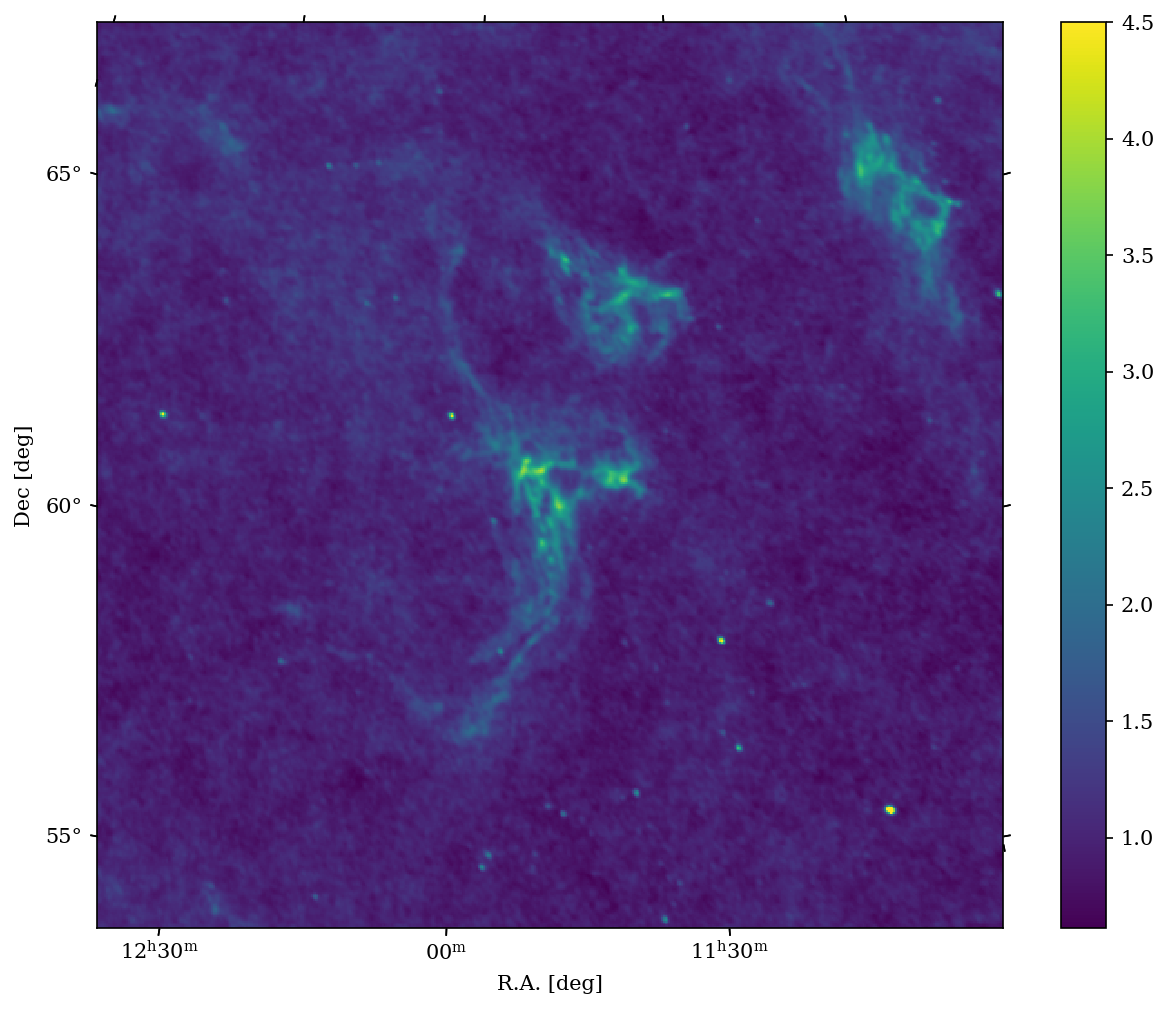

In [10]:
input_wcs = WCS(input_header)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=input_wcs)
lon, lat = ax.coords
im = ax.imshow(input_data, vmax=4.5, cmap='viridis', **imkw)
plt.colorbar(im, ax=ax)
lon.set_axislabel('R.A. [deg]')
lat.set_axislabel('Dec [deg]')

In [11]:
paths = SkyView().get_images(
    position='135., 54.',
    coordinates='galactic',
    pixels='300',
    scaling='Linear',
    survey=['EBHIS'],
    )

In [12]:
target_header, target_data = paths[0][0].header, paths[0][0].data

In [14]:
pprint(target_header)

SIMPLE  =                    T / Written by SkyView Mon Jun 28 07:34:47 EDT 2021
BITPIX  =                  -32 / 4 byte floating point                          
NAXIS   =                    2 / Two dimensional image                          
NAXIS1  =                  300 / Width of image                                 
NAXIS2  =                  300 / Height of image                                
CRVAL1  =               135.25 / Reference longitude                            
CRVAL2  =                54.25 / Reference latitude                             
CTYPE1  = 'GLON-TAN'           / Coordinates -- projection                      
CTYPE2  = 'GLAT-TAN'           / Coordinates -- projection                      
CRPIX1  =                150.5 / X reference pixel                              
CRPIX2  =                150.5 / Y reference pixel                              
CDELT1  = -0.054272999999999995 / X scale                                       
CDELT2  = 0.0542729999999999

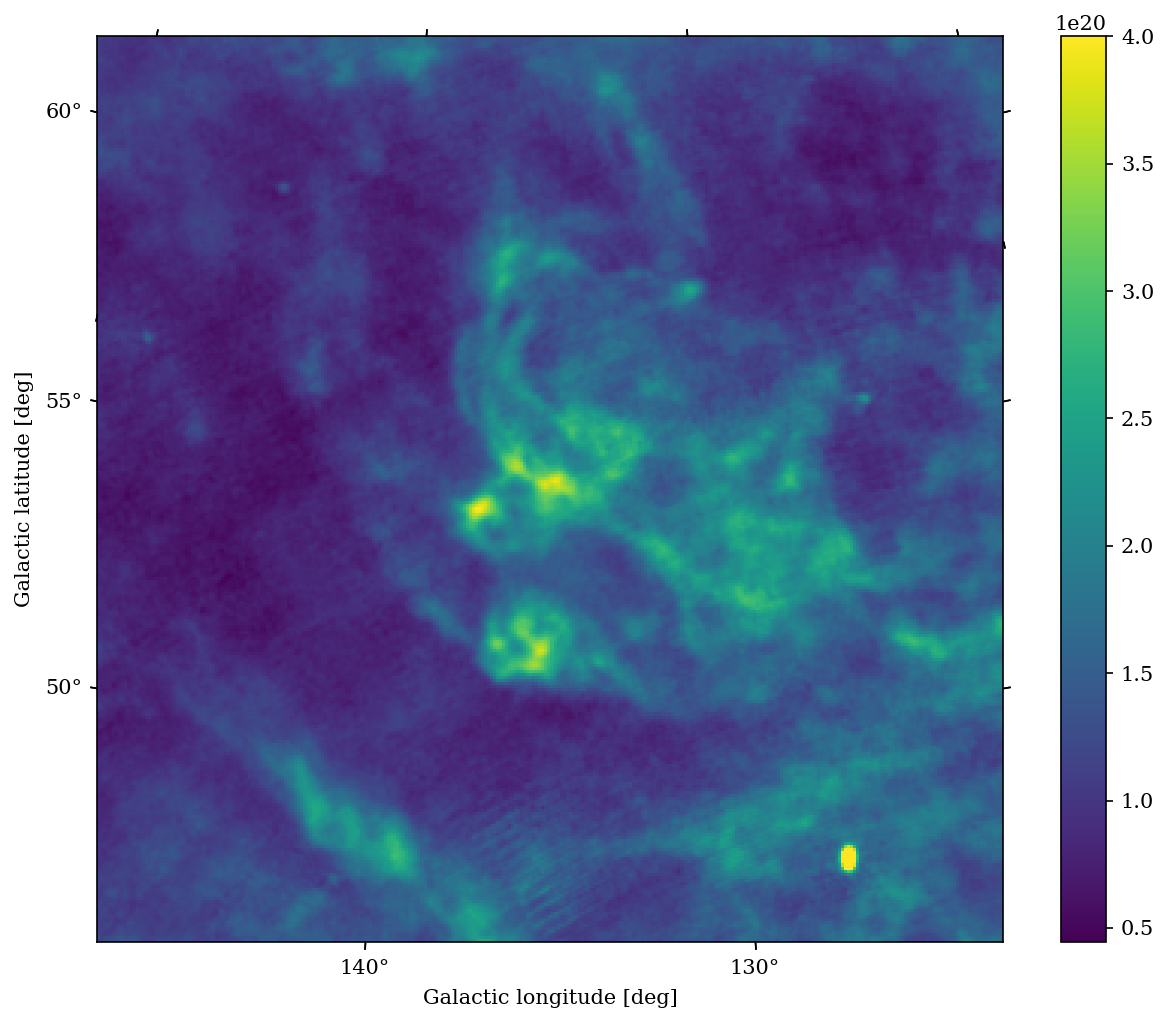

In [14]:
target_wcs = WCS(target_header)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=target_wcs)
lon, lat = ax.coords
im = ax.imshow(target_data, cmap='viridis', vmax=4.e20, **imkw)
plt.colorbar(im, ax=ax)
lon.set_axislabel('Galactic longitude [deg]')
lat.set_axislabel('Galactic latitude [deg]')

In [15]:
gridder = cygrid.WcsGrid(target_header)

In [16]:
input_lon_pix, input_lat_pix = np.meshgrid(
    np.arange(input_header['NAXIS1']),
    np.arange(input_header['NAXIS2'])
    )

In [17]:
input_lon_world, input_lat_world = input_wcs.all_pix2world(
    input_lon_pix, input_lat_pix, 0
    )

In [18]:
coords_eq = SkyCoord(
    input_lon_world, input_lat_world, frame='icrs', unit='deg'
    )
coords_gal = coords_eq.galactic

In [15]:
input_data.shape

(500, 500)

In [19]:
kernelsize_fwhm = 2.5/60.
# see https://en.wikipedia.org/wiki/Full_width_at_half_maximum
kernelsize_sigma = kernelsize_fwhm / np.sqrt(8 * np.log(2))
sphere_radius = 3. * kernelsize_sigma

gridder.set_kernel(
    'gauss1d',
    (kernelsize_sigma,),
    sphere_radius,
    kernelsize_sigma / 2.
    )

In [20]:
gridder.grid(
    coords_gal.l.value.flatten(),
    coords_gal.b.value.flatten(),
    input_data.flatten(),
    )

<ipython-input-20-5dc78283f2b0>:1: UserWarning: Input data byteorder not native, will fix
  gridder.grid(


In [21]:
datacube = gridder.get_datacube()

<ipython-input-21-3e00e8b31cb4>:1: RuntimeWarning: invalid value encountered in true_divide
  datacube = gridder.get_datacube()


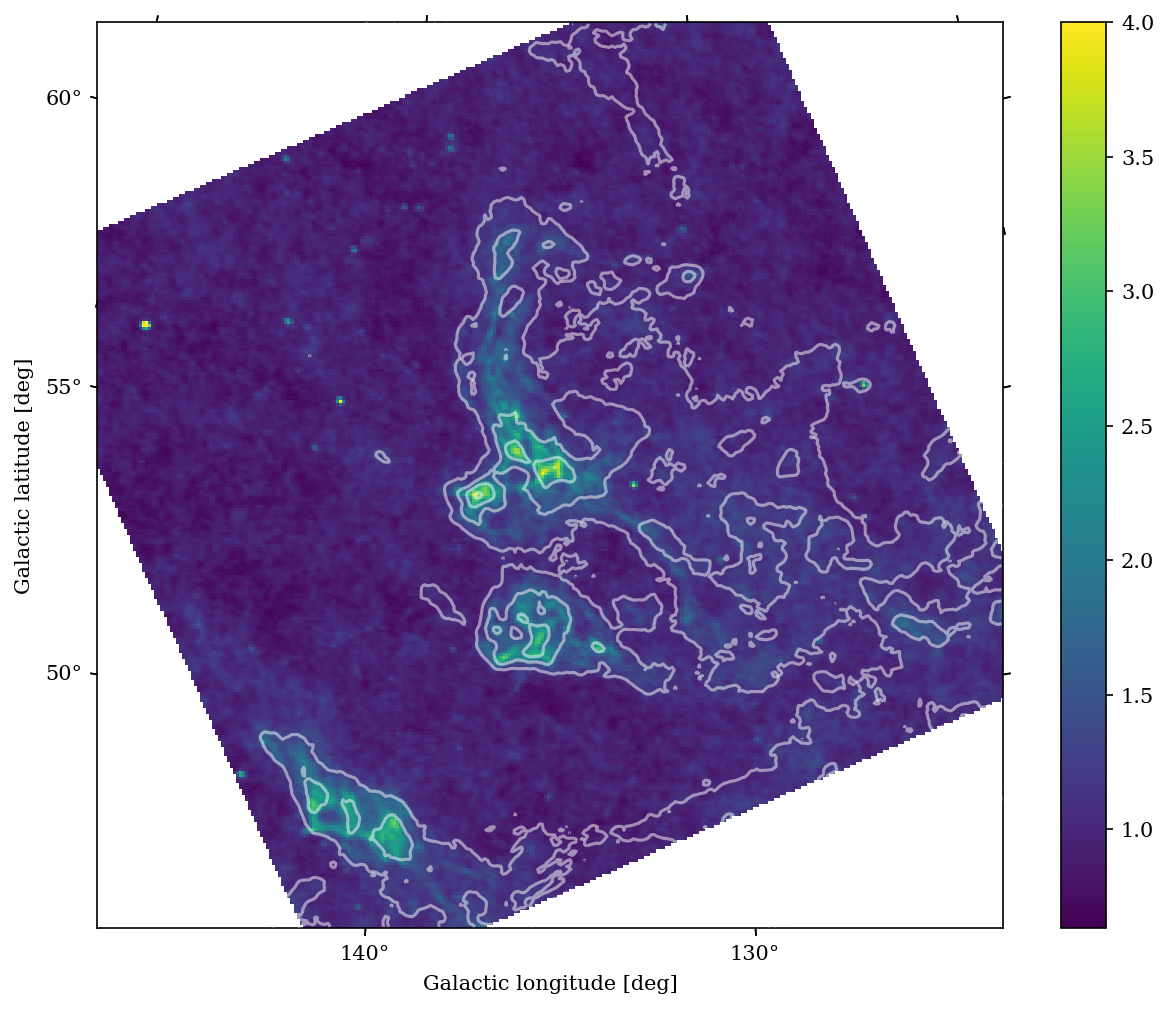

In [22]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=target_wcs)
lon, lat = ax.coords
im = ax.imshow(datacube, cmap='viridis', vmax=4., **imkw)
plt.colorbar(im, ax=ax)
ax.contour(
    target_data, colors='white',
    levels=np.arange(1.5e20, 1.e21, 8.e19), alpha=0.5
    )
lon.set_axislabel('Galactic longitude [deg]')
lat.set_axislabel('Galactic latitude [deg]')

## 

In [19]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.io import fits
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from scipy.interpolate import griddata

import cygrid

In [21]:
imkw = dict(origin='lower', interpolation='nearest')

In [190]:
def setup_data(mapcenter, mapsize, vsize, beamsize_fwhm, num_samples, num_sources):
    '''
    Produce test data (including coords) - containing just noise and some point sources.
    
    Note: as in real astronomical measurements, the point sources are convolved with the
          instrument's response function (PSF), or telescope beam.
    '''

    lon_scale = np.cos(np.radians(mapcenter[1]))
    map_l, map_r = (
        mapcenter[0] - 1.1 * mapsize[0] / 2. / lon_scale,
        mapcenter[0] + 1.1 * mapsize[0] / 2. / lon_scale
        )
    map_b, map_t = mapcenter[1] - 1.1 * mapsize[1] / 2., mapcenter[1] + 1.1 * mapsize[1] / 2.
    
    # coordinates are drawn from a uniform distribution
    xcoords = np.random.uniform(map_l, map_r, num_samples).astype(np.float64)
    ycoords = np.random.uniform(map_b, map_t, num_samples).astype(np.float64)

    # add Gaussian noise
    signal = np.random.normal(0., 1., vsize*len(xcoords)).reshape(-1, vsize)
    
    beamsize_sigma = beamsize_fwhm / np.sqrt(8 * np.log(2))
    
    # put in artifical point source, with random amplitudes
    # we'll assume a Gaussian-shaped PSF
    
    def gauss2d(x, y, x0, y0, A, s):
        return A * np.exp(-((x-x0)**2 + (y-y0)**2) / 2. / s**2)
    
    for i in range(vsize):
        sou_x = np.random.uniform(map_l, map_r, num_sources).astype(np.float64)
        sou_y = np.random.uniform(map_b, map_t, num_sources).astype(np.float64)
        for _ in range(num_sources):

            A = np.random.uniform(5, 10, 1)
            signal[:, i] = signal[:, i] + gauss2d(xcoords, ycoords, sou_x[_], sou_y[_], A, beamsize_sigma)

    return xcoords, ycoords, signal

In [191]:
mapcenter = 60., 30.  # all in degrees
mapsize = 5., 7.
vsize = 6
beamsize_fwhm = 0.1
num_samples = 10 ** 6
num_sources = 10

xcoords, ycoords, signal = setup_data(
    mapcenter, mapsize, vsize, beamsize_fwhm, num_samples, num_sources
    )

In [192]:
signal.shape

(1000000, 6)

In [193]:
def setup_header(mapcenter, mapsize, vsize, beamsize_fwhm):
    '''
    Produce a FITS header that contains the target field.
    '''
    
    # define target grid (via fits header according to WCS convention)
    # a good pixel size is a third of the FWHM of the PSF (avoids aliasing)
    pixsize = beamsize_fwhm / 3.
    dnaxis1 = int(mapsize[0] / pixsize)
    dnaxis2 = int(mapsize[1] / pixsize)

    header = {
        'NAXIS': 3,
        'NAXIS1': dnaxis1,
        'NAXIS2': dnaxis2,
        'NAXIS3': vsize,
        'CTYPE1': 'RA---SIN',
        'CUNIT1': 'deg',
        'CDELT1': -pixsize,
        'CRPIX1': dnaxis1 / 2.,
        'CRVAL1': mapcenter[0],
        'CTYPE2': 'DEC--SIN',
        'CUNIT2': 'deg',
        'CDELT2': pixsize,
        'CRPIX2': dnaxis2 / 2.,
        'CRVAL2': mapcenter[1],
        'CTYPE3': 'VOBS',
        'CUNIT3': 'K',
        'CDELT3': 1,
        'CRPIX3': vsize / 2.,
        'CRVAL3': 0,
        }
    
    return header

In [194]:
target_header = setup_header(mapcenter, mapsize, vsize, beamsize_fwhm)

# let's already define a WCS object for later use in our plots:
target_wcs = WCS(target_header)

In [195]:
gridder = cygrid.WcsGrid(target_header)

In [196]:
kernelsize_fwhm = 2.5 / 60.  # degrees
# see https://en.wikipedia.org/wiki/Full_width_at_half_maximum
kernelsize_sigma = kernelsize_fwhm / np.sqrt(8 * np.log(2))
sphere_radius = 3. * kernelsize_sigma

gridder.set_kernel(
    'gauss1d',
    (kernelsize_sigma,),
    sphere_radius,
    kernelsize_sigma / 2.
    )

In [197]:
gridder.grid(xcoords, ycoords, signal)

In [198]:
cygrid_map = gridder.get_datacube()

In [199]:
cygrid_map.shape

(6, 210, 150)

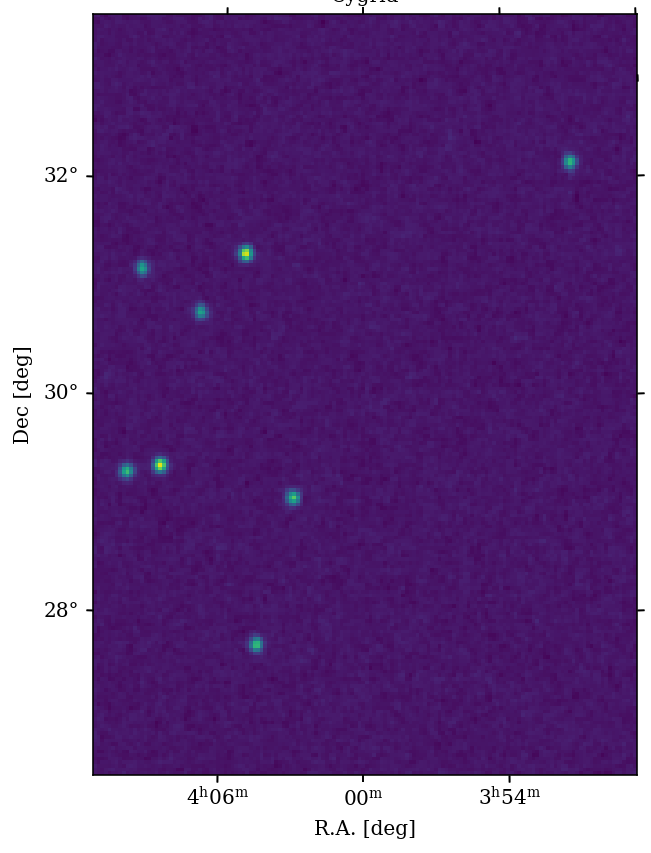

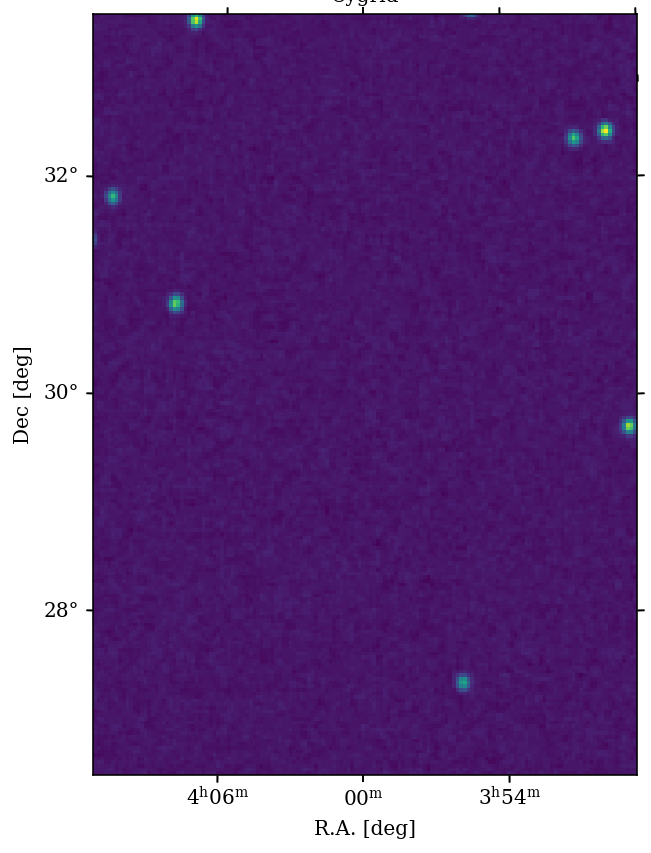

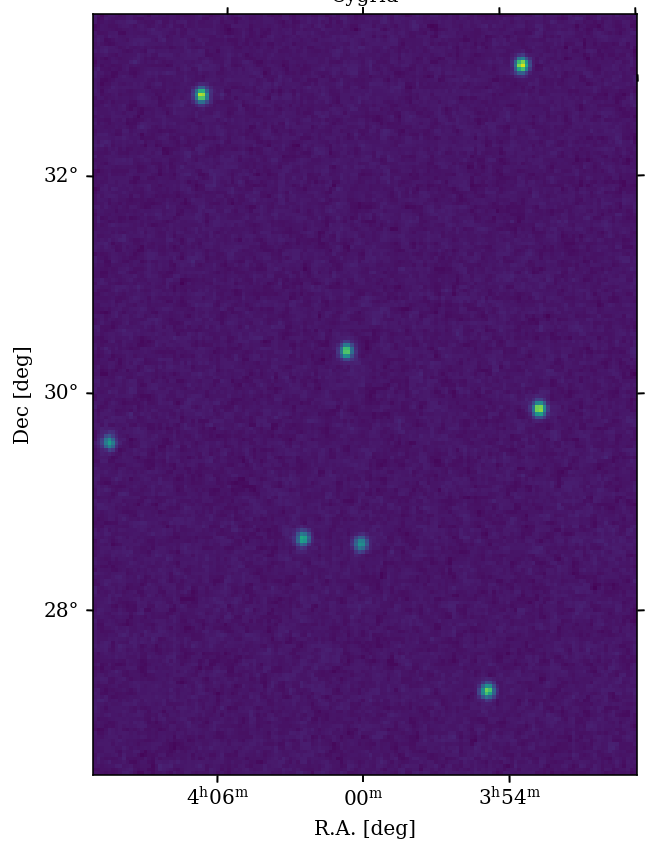

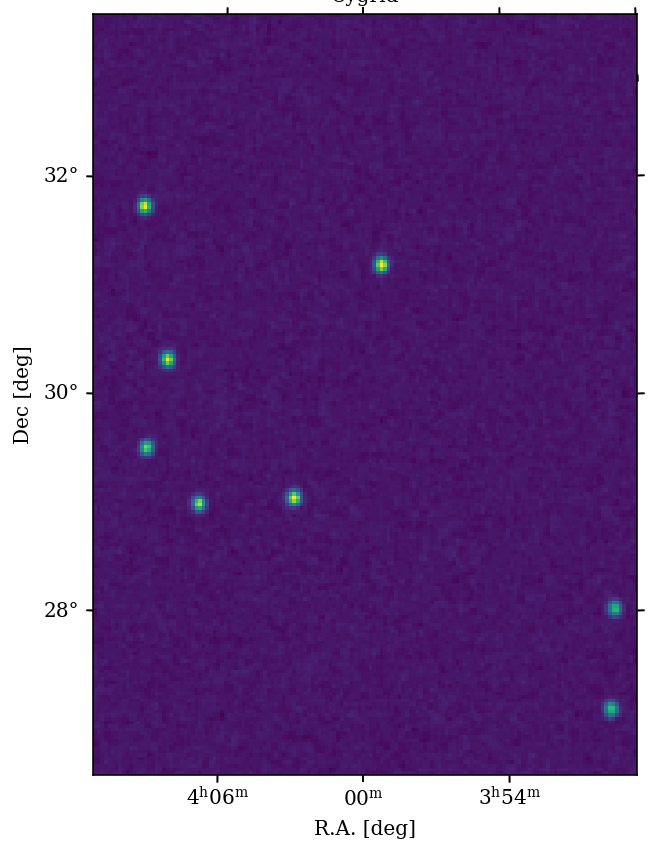

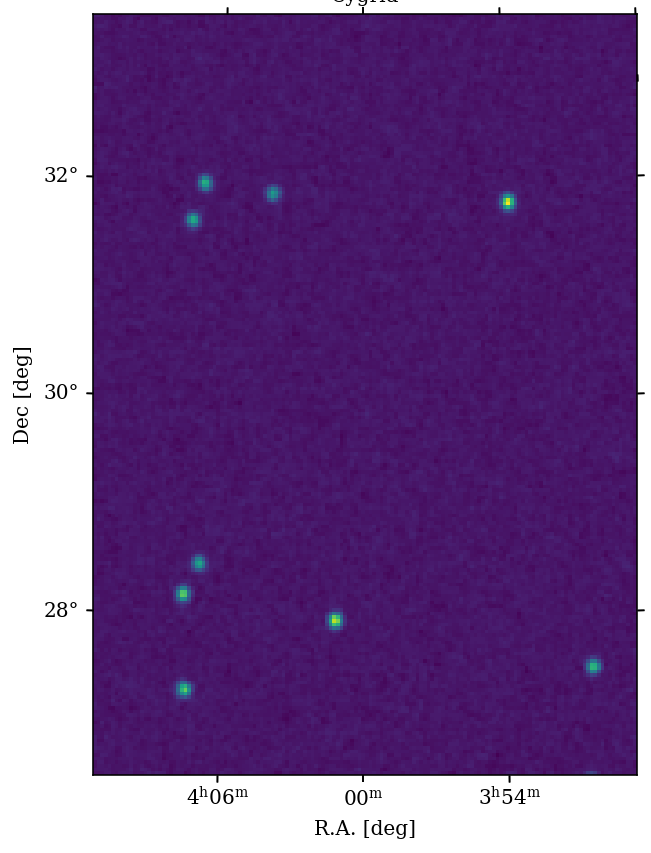

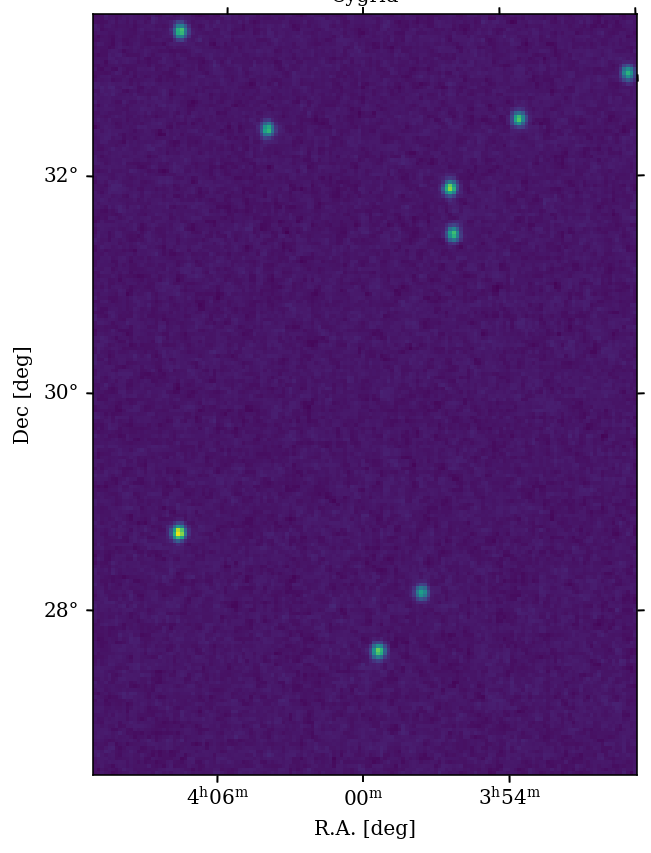

In [200]:
for cymap in cygrid_map:
    fig = plt.figure(figsize=(14, 7))
    ax1 = fig.add_subplot(111, projection=target_wcs.celestial)
    ax1.imshow(cymap, vmin=-0.5, vmax=8.0, **imkw)
    ax1.set_title('Cygrid')
    lon, lat = ax1.coords
    lon.set_axislabel('R.A. [deg]')
    lat.set_axislabel('Dec [deg]')
    plt.show()